In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [8]:
SEED = 42

In [9]:
df_train = pd.read_csv('../databases/training.csv')
df_valid = pd.read_csv('../databases/validation.csv')

In [10]:
X_train, y_train = df_train.drop(['IND_BOM_1_1'], axis=1), df_train['IND_BOM_1_1']
X_val, y_val = df_valid.drop(['IND_BOM_1_1'], axis=1), df_valid['IND_BOM_1_1']

In [11]:
X_train = np.array(X_train)
X_val = np.array(X_val)

In [12]:
rfc = RandomForestClassifier(max_depth=19 , n_estimators=970,
                             random_state=SEED)

In [13]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=19, n_estimators=970, random_state=42)

In [14]:
y_pred = rfc.predict(X_val)

In [15]:
from sklearn import tree

In [16]:
accuracy_score(y_val, y_pred)

0.6215673297777086

              precision    recall  f1-score   support

           0       0.47      0.70      0.56     44252
           1       0.79      0.58      0.67     84183

    accuracy                           0.62    128435
   macro avg       0.63      0.64      0.61    128435
weighted avg       0.68      0.62      0.63    128435



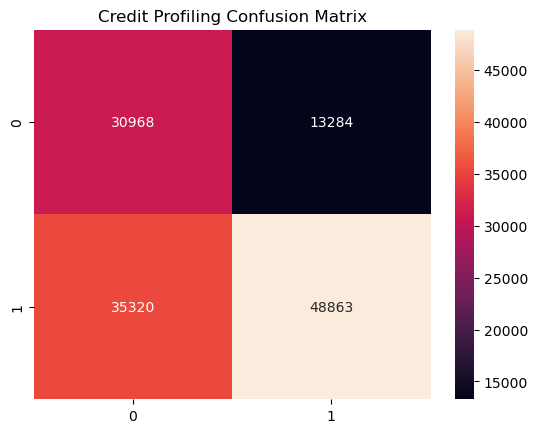

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Credit Profiling Confusion Matrix')

print(classification_report(y_val,y_pred))

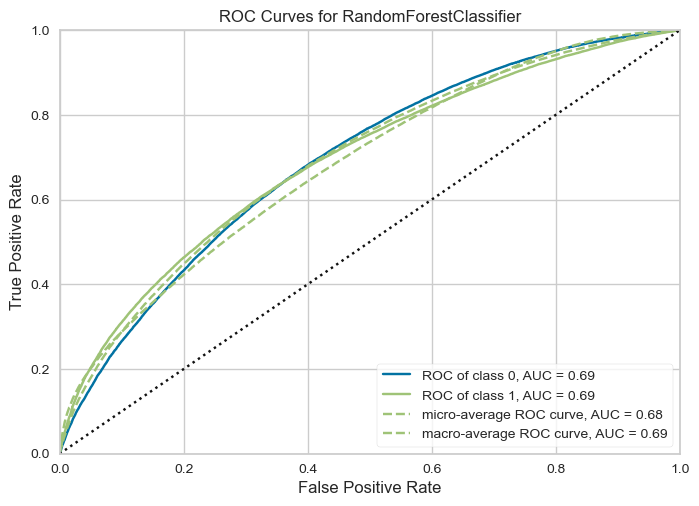

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [18]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(rfc)

visualizer.fit(X_train, y_train)        
visualizer.score(X_val, y_val)    
visualizer.show()   